<a href="https://colab.research.google.com/github/Madhuri-111/Ecommerce_business_case/blob/main/data_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customer= pd.read_excel("/content/CustomersData.xlsx")
online_sales= pd.read_csv("/content/Online_Sales.csv")

### **Identify the months with the highest and lowest acquisition rates. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?**


*   First plotted total sales per month
*   Then for the whole year : for each customer only the first purchase in that year has been taken to know about customer acquisition.




In [ ]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [ ]:
online_sales['Transaction_Date']= pd.to_datetime(online_sales['Transaction_Date'])
online_sales['Transaction_Month']= online_sales['Transaction_Date'].dt.strftime("%B")

#for customer acquisition
sales_acquired = online_sales.groupby("CustomerID")["Transaction_Date"].agg("min").reset_index()
sales_acquired.describe()
sales_acquired['Transaction_Month']= sales_acquired['Transaction_Date'].dt.strftime("%B")
sales_acquired['Transaction_Month'].value_counts()

,count
Transaction_Month,
January,215
March,177
April,163
June,137
August,135
May,112
December,106
February,96
July,94


**Insight:**
*   Highest Acquisition: January
*   Lowest Acquisition: November

<ipython-input-8-b13acb578002>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(online_sales["Transaction_Month"].value_counts(), palette='viridis', edgecolor='black', ax=axes[0])
<ipython-input-8-b13acb578002>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, fontsize=10)
<ipython-input-8-b13acb578002>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(sales_acquired["Transaction_Month"].value_counts(), palette='viridis', edgecolor='black', ax= axes[1])
<ipython-input-8-b13acb578002>:10: UserWarning: set_ticklabels() should only be used with a fi

Text(0, 0.5, 'count')

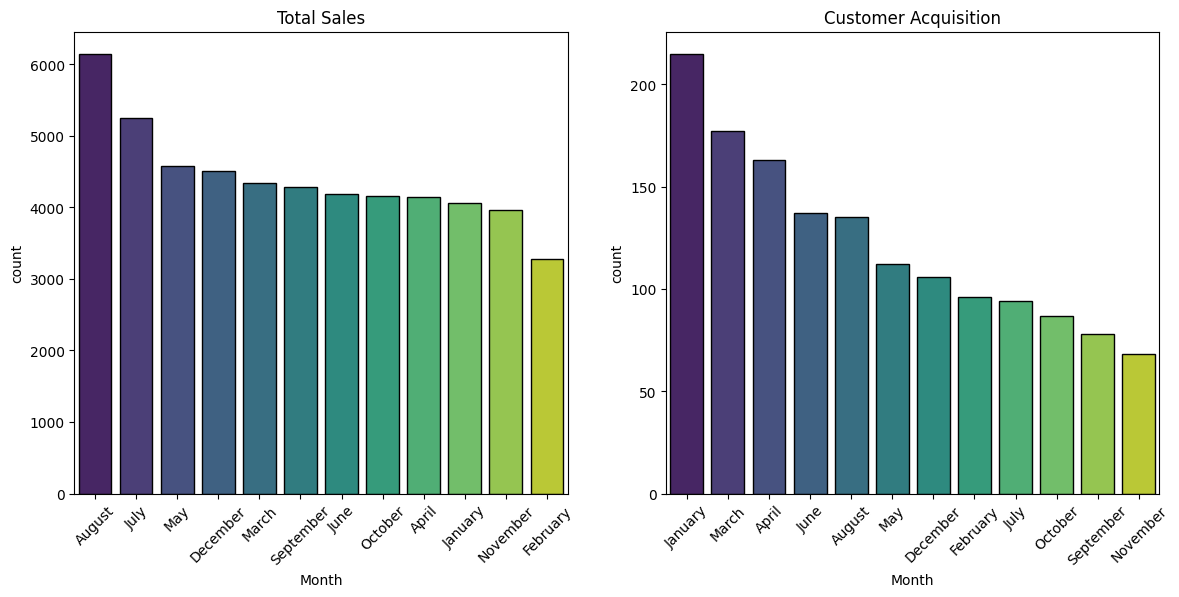

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns
sns.barplot(online_sales["Transaction_Month"].value_counts(), palette='viridis', edgecolor='black', ax=axes[0])
axes[0].set_title("Total Sales", fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, fontsize=10)
axes[0].set_xlabel("Month", fontsize=10)
axes[0].set_ylabel("count", fontsize=10)

sns.barplot(sales_acquired["Transaction_Month"].value_counts(), palette='viridis', edgecolor='black', ax= axes[1])
axes[1].set_title("Customer Acquisition", fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, fontsize=10)
axes[1].set_xlabel("Month", fontsize=10)
axes[1].set_ylabel("count", fontsize=10)

Strategies to Address Fluctuations & Ensure Consistent Growth:


*   For Low-Acquisition Months (like November and December):

1.   Holiday Campaigns & Discounts: Leverage the festive season to offer attractive bundles or exclusive deals.
2.   Content Push: Publish high-traffic blog posts, reels, or educational content to maintain visibility.
3. Partnerships & Affiliates: Use affiliates or micro-influencers to reach wider audiences.


*   For High-Acquisition Months (like January):


1.   Double Down on What Works: Analyze what campaigns performed well and scale them.
2.   Enhance Onboarding: Ensure users acquired convert to active, loyal customers.
3. Referral Incentives: Encourage new users to bring others.





### **Analyze the data to determine if certain months consistently show higher or lower acquisition rates. How can the company capitalize on high-performing months and improve performance during slower periods?**

<ipython-input-13-c4b708f63509>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


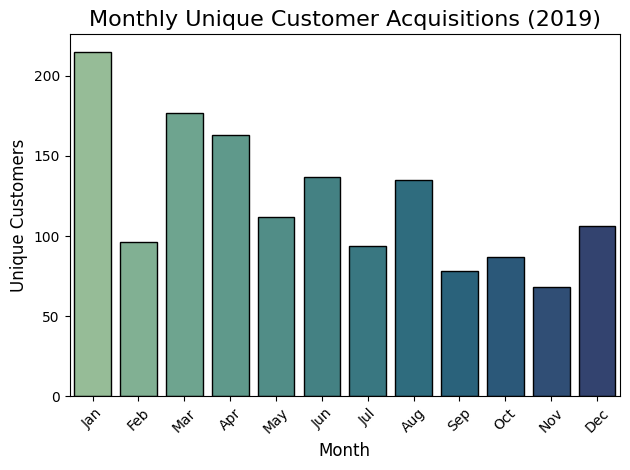

In [ ]:
#for customer acquisition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sales_acquired = online_sales.groupby("CustomerID")["Transaction_Date"].agg("min").reset_index()
sales_acquired.describe()
sales_acquired['Month']= sales_acquired['Transaction_Date'].dt.strftime("%b")
sales_acquired= sales_acquired['Month'].value_counts().reset_index()
sales_acquired.columns= ['Month', 'Unique_Customers']

sns.barplot(
    data=sales_acquired,
    x='Month',
    y='Unique_Customers',
    order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    palette='crest',
    edgecolor='black'
)

plt.title('Monthly Unique Customer Acquisitions (2019)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Unique Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Strategic Recommendations**

Capitalize on High-Acquisition Months (Jan, Mar, Apr):

1.   Double Marketing Spend: Allocate more ad budget to capitalize on high intent during these months.
2.   Seasonal Bundles & Upsells: Offer related products as bundles during high-traffic periods.
3. Referral Incentives: Introduce “Bring a Friend” campaigns to amplify growth while momentum is high.
4. Retargeting Strategy: Capture high-performing visitors and nurture them in the slower months.

Improve Low-Performing Months (Feb, Sep, Nov):

1.  Promotional Campaigns: Run themed campaigns like “Winter Warm-Up Sale” (Feb) or “Fall Favorites” (Sep).
2. Reactivation Emails: Target past customers with loyalty discounts or new product launches.
3. Customer Research: Survey users on what would motivate them to purchase during these months.
4. Cross-Promotion: Partner with influencers or affiliate networks to increase visibility.

### **Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?**